### Server Summarizing Prompts

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap
import os
import torch

# # Number of rounds and the number of embeddings per round
# rounds = 10
# embeddings_per_round = 5
# embedding_dim = 50

# # Step 1: Generate random embeddings for each round (5 embeddings per round, each with 50 dimensions)
# data = np.random.rand(rounds, embeddings_per_round, embedding_dim)

In [3]:
data_path = "../other_outputs/food101/L2P_Prob/server"
data = []
for file in os.listdir(data_path):
    file_path = os.path.join(data_path, file)
    round_num = int(file.split("_")[-1].split(".")[0])
    data_round = torch.load(file_path) 
    print(data_round.shape, round_num)
    data.append(np.array(data_round))


torch.Size([18, 768]) 150
torch.Size([44, 768]) 225
torch.Size([25, 768]) 75
torch.Size([14, 768]) 1
torch.Size([41, 768]) 100
torch.Size([73, 768]) 250
torch.Size([35, 768]) 200
torch.Size([32, 768]) 125
torch.Size([16, 768]) 25
torch.Size([33, 768]) 50
torch.Size([21, 768]) 175


/tmp/ipykernel_316014/69377297.py:46: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ticks=[0, 2, 4, 6, 8, 9])


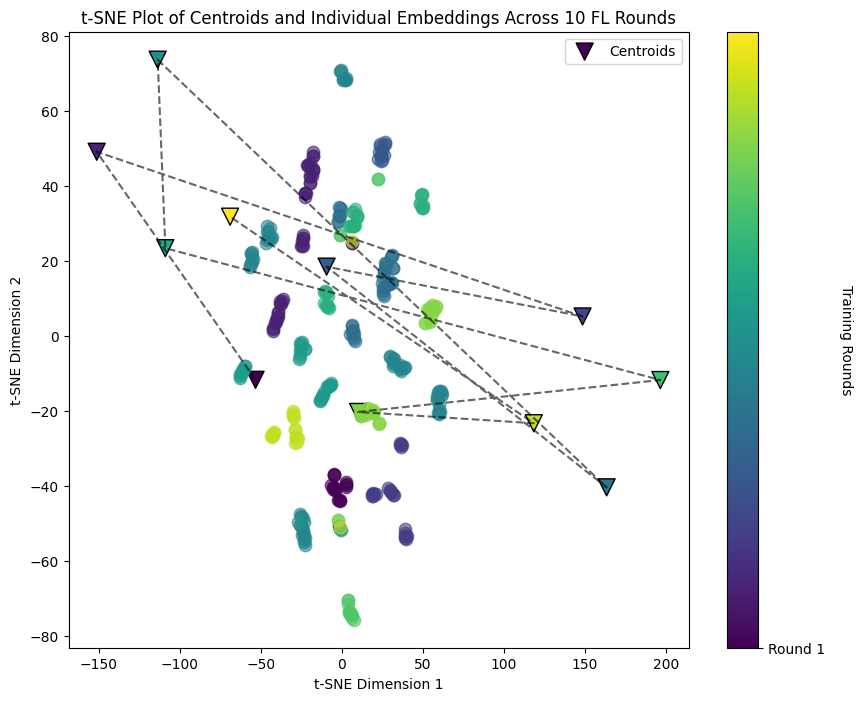

In [4]:
# Number of rounds
rounds = len(data)

# Step 1: Compute centroids (mean of embeddings for each round)
centroids = [np.mean(round_embeddings, axis=0) for round_embeddings in data]

# Convert centroids to a 2D NumPy array
centroids = np.vstack(centroids)

# Step 2: Apply t-SNE to reduce dimensionality to 2D for visualization (on centroids)
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
tsne_result = tsne.fit_transform(centroids)

# Step 3: Apply t-SNE to the individual embeddings for each round
# First, flatten the data into a single array for t-SNE
individual_embeddings = np.vstack(data)  # Combine all rounds' embeddings into a single array

# Apply t-SNE to the individual embeddings
tsne_individual = tsne.fit_transform(individual_embeddings)

# Step 4: Use a "viridis" colormap for better visibility of round progression
cmap = plt.cm.viridis  # "viridis" is a perceptually uniform colormap

# Step 5: Plotting the t-SNE result for centroids and individual embeddings
plt.figure(figsize=(10, 8))

# Plot centroids of each round with triangular markers ('v')
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=range(rounds), cmap=cmap, s=150, edgecolors='black', marker='v', label='Centroids')

# Add line connecting the centroids to show trajectory
plt.plot(tsne_result[:, 0], tsne_result[:, 1], c='black', linestyle='--', alpha=0.6)

# Plot individual embeddings for each round
start_idx = 0
for i in range(rounds):
    end_idx = start_idx + len(data[i])  # Get the end index for the current round's embeddings
    round_embeddings_tsne = tsne_individual[start_idx:end_idx]
    
    # Plot the individual embeddings, semi-transparent
    plt.scatter(round_embeddings_tsne[:, 0], round_embeddings_tsne[:, 1], c=[cmap(i / rounds)], s=80, alpha=0.6)

    # Update start index for the next round's embeddings
    start_idx = end_idx

# Step 6: Add a colorbar to represent the rounds
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ticks=[0, 2, 4, 6, 8, 9])
cbar.set_ticklabels(['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 10'])
cbar.set_label('Training Rounds', rotation=270, labelpad=20)

# Step 7: Label the plot
plt.title("t-SNE Plot of Centroids and Individual Embeddings Across 10 FL Rounds")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Step 8: Display the plot
plt.legend()
plt.show()

### Client Prompts

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap
import os
import torch

In [7]:
data_path = "../other_outputs/food101/L2P_Prob/test"
data = []
for file in os.listdir(data_path):
    file_path = os.path.join(data_path, file)
    round_num = int(file.split("_")[-1].split(".")[0])
    if file.startswith("summarizing_prompts"):
        data_round = torch.load(file_path)
        data_round = data_round.reshape(data_round.shape[0], -1)
        print(data_round.shape)
        data.append(np.array(data_round))


torch.Size([287, 3840])
torch.Size([287, 3840])
torch.Size([287, 3840])
torch.Size([287, 3840])
torch.Size([287, 3840])
torch.Size([287, 3840])
torch.Size([287, 3840])
torch.Size([287, 3840])
torch.Size([287, 3840])
torch.Size([287, 3840])


/tmp/ipykernel_316014/3923241403.py:46: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ticks=[0, 2, 4, 6, 8, 9])


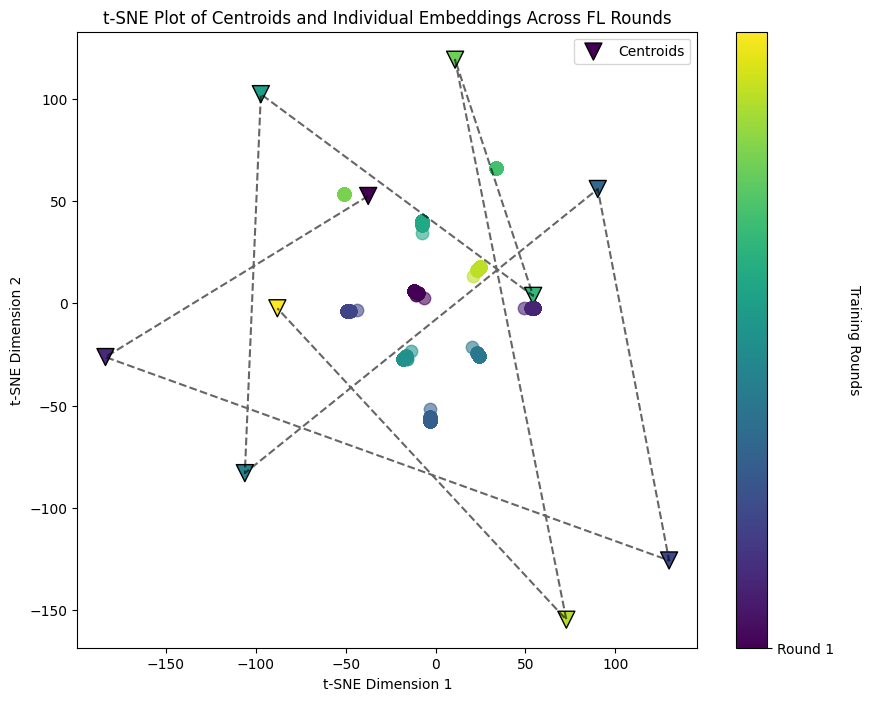

In [9]:
# Number of rounds
rounds = len(data)

# Step 1: Compute centroids (mean of embeddings for each round)
centroids = [np.mean(round_embeddings, axis=0) for round_embeddings in data]

# Convert centroids to a 2D NumPy array
centroids = np.vstack(centroids)

# Step 2: Apply t-SNE to reduce dimensionality to 2D for visualization (on centroids)
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
tsne_result = tsne.fit_transform(centroids)

# Step 3: Apply t-SNE to the individual embeddings for each round
# First, flatten the data into a single array for t-SNE
individual_embeddings = np.vstack(data)  # Combine all rounds' embeddings into a single array

# Apply t-SNE to the individual embeddings
tsne_individual = tsne.fit_transform(individual_embeddings)

# Step 4: Use a "viridis" colormap for better visibility of round progression
cmap = plt.cm.viridis  # "viridis" is a perceptually uniform colormap

# Step 5: Plotting the t-SNE result for centroids and individual embeddings
plt.figure(figsize=(10, 8))

# Plot centroids of each round with triangular markers ('v')
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=range(rounds), cmap=cmap, s=150, edgecolors='black', marker='v', label='Centroids')

# Add line connecting the centroids to show trajectory
plt.plot(tsne_result[:, 0], tsne_result[:, 1], c='black', linestyle='--', alpha=0.6)

# Plot individual embeddings for each round
start_idx = 0
for i in range(rounds):
    end_idx = start_idx + len(data[i])  # Get the end index for the current round's embeddings
    round_embeddings_tsne = tsne_individual[start_idx:end_idx]
    
    # Plot the individual embeddings, semi-transparent
    plt.scatter(round_embeddings_tsne[:, 0], round_embeddings_tsne[:, 1], c=[cmap(i / rounds)], s=80, alpha=0.6)

    # Update start index for the next round's embeddings
    start_idx = end_idx

# Step 6: Add a colorbar to represent the rounds
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ticks=[0, 2, 4, 6, 8, 9])
cbar.set_ticklabels(['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 10'])
cbar.set_label('Training Rounds', rotation=270, labelpad=20)

# Step 7: Label the plot
plt.title("t-SNE Plot of Centroids and Individual Embeddings Across FL Rounds")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Step 8: Display the plot
plt.legend()
plt.show()

### Others

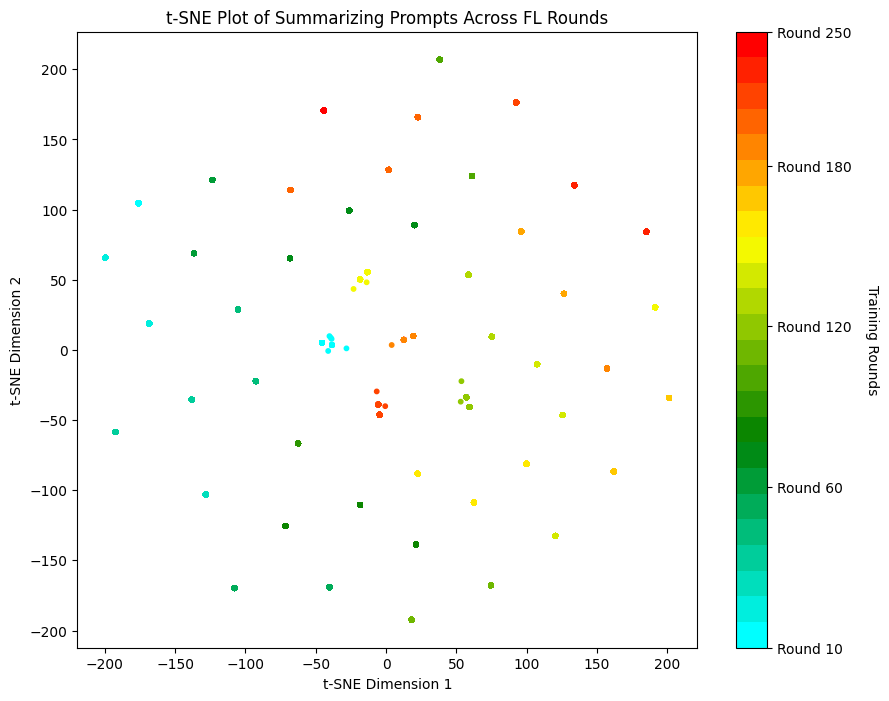

In [3]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap

# Path to the folder containing the .pt files
folder_path = "output/summarizing_prompts/test"

# Sort and load the files in a specific order
# Adjusting file names for natural order by extracting round numbers
files = sorted(
    [f for f in os.listdir(folder_path) if f.endswith('.pt')],
    key=lambda x: int(x.split('_')[-1].split('.')[0])
)

# Load the data from each file and reshape it
data = []
round_indices = []  # To keep track of rounds for coloring
for idx, file in enumerate(files):
    file_path = os.path.join(folder_path, file)
    tensor_data = torch.load(file_path)  # Shape: [1823, 5, 768]
    reshaped_data = tensor_data.view(1823, -1)  # Reshape to [1823, 3840]
    data.append(reshaped_data.numpy())  # Convert to numpy for easy processing
    round_indices.extend([idx] * 1823)  # Assign the same color for each sample in a round

# Convert data list to a single numpy array and round_indices to numpy array
data = np.vstack(data)  # Each row represents one sample's flattened embedding
round_indices = np.array(round_indices)

# Apply t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_result = tsne.fit_transform(data)

# Define a custom colormap that goes from cyan to green to yellow to red
colors = ["cyan", "green", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(files))

# Plotting the t-SNE result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=round_indices, cmap=cmap, s=10)

# Adding a colorbar to represent rounds
cbar = plt.colorbar(scatter, ticks=[0, len(files)//4, len(files)//2, 3*len(files)//4, len(files)-1])
cbar.set_ticklabels(['Round {}'.format(i) for i in [10, 60, 120, 180, 250]])  # Customize as per rounds
cbar.set_label('Training Rounds', rotation=270, labelpad=20)

# Label the plot
plt.title("t-SNE Plot of Summarizing Prompts Across FL Rounds")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [ ]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler

# Path to the folder containing the .pt files
folder_path = "output/summarizing_prompts/test"

# Sort and load the files in a specific order
# Adjusting file names for natural order by extracting round numbers
files = sorted(
    [f for f in os.listdir(folder_path) if f.endswith('.pt')],
    key=lambda x: int(x.split('_')[-1].split('.')[0])
)

# Initialize a MinMaxScaler for scaling to [0, 1]
scaler = MinMaxScaler()

# Load the data from each file, reshape, and scale
data = []
round_indices = []  # To keep track of rounds for coloring
for idx, file in enumerate(files):
    file_path = os.path.join(folder_path, file)
    tensor_data = torch.load(file_path)  # Shape: [1823, 5, 768]
    reshaped_data = tensor_data.view(1823, -1)  # Reshape to [1823, 3840]

    # Apply Min-Max scaling to [0, 1] for each prompt
    scaled_data = scaler.fit_transform(reshaped_data.numpy())  # Scale each sample

    data.append(scaled_data)  # Append scaled data
    round_indices.extend([idx] * 1823)  # Assign the same color for each sample in a round

# Convert data list to a single numpy array and round_indices to numpy array


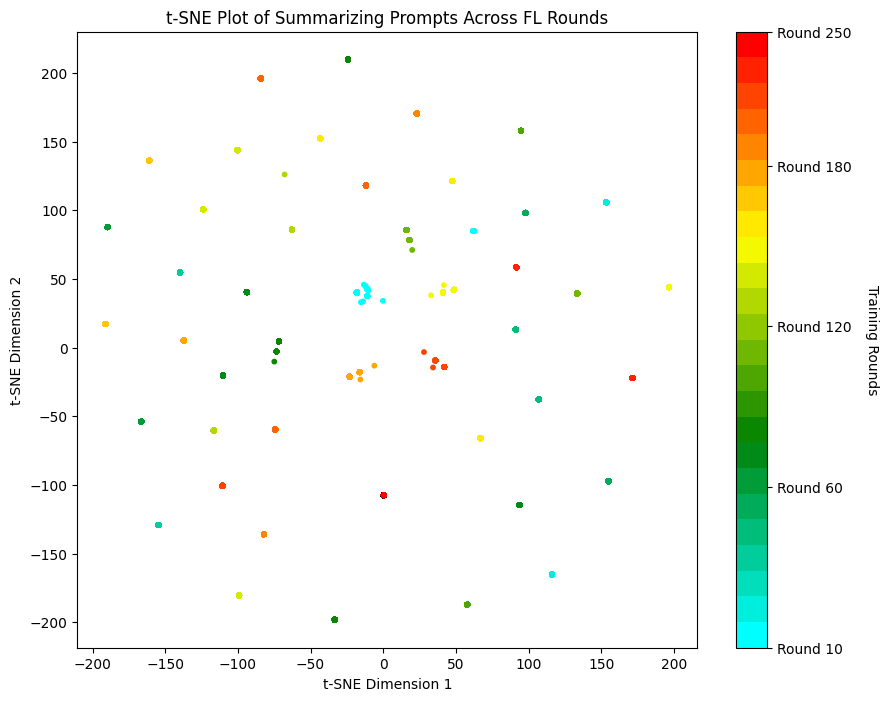

In [6]:
data = np.vstack(data)  # Each row represents one sample's flattened embedding
round_indices = np.array(round_indices)

# Apply t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_result = tsne.fit_transform(data)

# Define a custom colormap that goes from cyan to green to yellow to red
colors = ["cyan", "green", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(files))

# Plotting the t-SNE result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=round_indices, cmap=cmap, s=10)

# Adding a colorbar to represent rounds
cbar = plt.colorbar(scatter, ticks=[0, len(files)//4, len(files)//2, 3*len(files)//4, len(files)-1])
cbar.set_ticklabels(['Round {}'.format(i) for i in [10, 60, 120, 180, 250]])  # Customize as per rounds
cbar.set_label('Training Rounds', rotation=270, labelpad=20)

# Label the plot
plt.title("t-SNE Plot of Summarizing Prompts Across FL Rounds")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [2]:
import torch
import os

# Đặt giá trị cho các biến theo yêu cầu
dataset = "food101"
model = "L2P_Prob"
flag = "test"
current_round = 250

def load_and_save_filtered_embeddings(flag, current_round):
    base_path = f"output/{dataset}/{model}/{flag}"
    save_path = f"{base_path}/filtered_embeddings_round_{current_round}.pt"
    
    # Đường dẫn tới file cụ thể theo round
    file_name = f"sample_data_round_{current_round}.pt"
    file_path = os.path.join(base_path, file_name)
    
    if os.path.exists(file_path):
        data = torch.load(file_path)
        print(f"Loaded data from {file_path}")
        
        # Danh sách để lưu các embedding đã lọc
        filtered_embeddings = []
        
        for batch_data in data:
            # Lấy danh sách missing_type và embedding_after_classifier
            missing_type = batch_data["missing_type"]
            embedding_after_classifier = batch_data["embedding_after_classifier"]
            
            # Lấy các chỉ số có missing_type == 0
            indices = [i for i, val in enumerate(missing_type) if val == 0]
            
            # Lọc embedding_after_classifier theo các chỉ số
            filtered_embedding = embedding_after_classifier[indices]
            
            # Thêm các embedding đã lọc vào danh sách kết quả
            filtered_embeddings.append(filtered_embedding)
        
        # Lưu các embedding đã lọc vào file .pt mới
        torch.save(filtered_embeddings, save_path)
        print(f"Filtered embeddings saved to {save_path}")
    else:
        print(f"File {file_name} not found at {file_path}")

    return filtered_embeddings

# Gọi hàm để thực hiện
embedding = load_and_save_filtered_embeddings(flag, current_round)



Loaded data from output/food101/L2P_Prob/test/sample_data_round_250.pt
Filtered embeddings saved to output/food101/L2P_Prob/test/filtered_embeddings_round_250.pt


In [23]:
embedding[1].shape

torch.Size([161, 768])

In [3]:
stacked_tensor = torch.cat(embedding, dim=0)
stacked_tensor.shape

torch.Size([1094, 101])

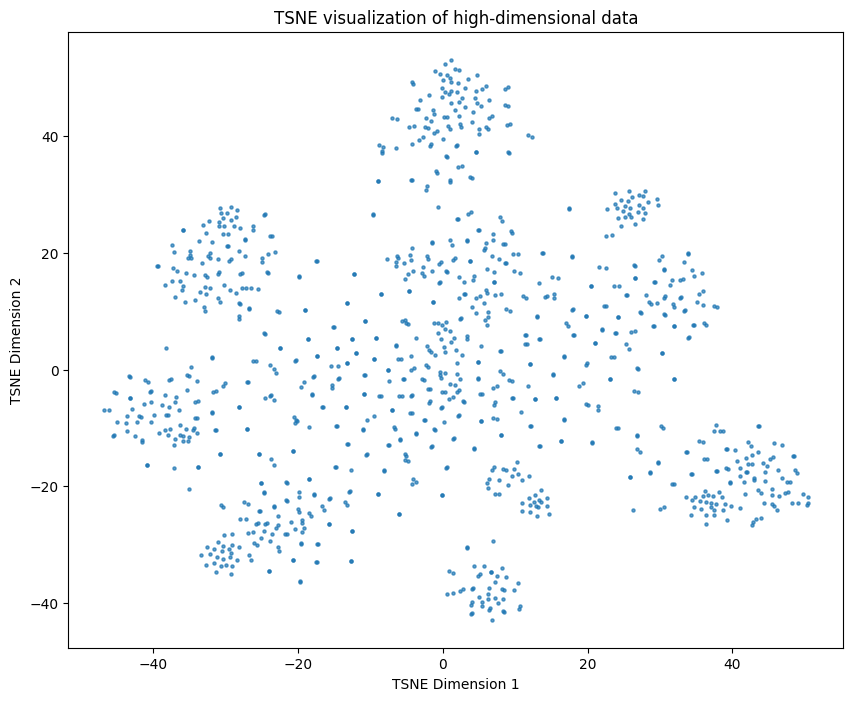

In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Khởi tạo một tensor ngẫu nhiên với kích thước torch.Size([1094, 768])
# data_tensor = torch.randn(1094, 768)

# Chuyển đổi tensor sang numpy để sử dụng với TSNE của sklearn
data_np = stacked_tensor.numpy()

# Thực hiện giảm chiều bằng TSNE xuống còn 2 chiều
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_np)

# Vẽ biểu đồ TSNE
plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], s=5, alpha=0.7)
plt.title("TSNE visualization of high-dimensional data")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.show()


/mnt/disk1/miniconda3/envs/fmfl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


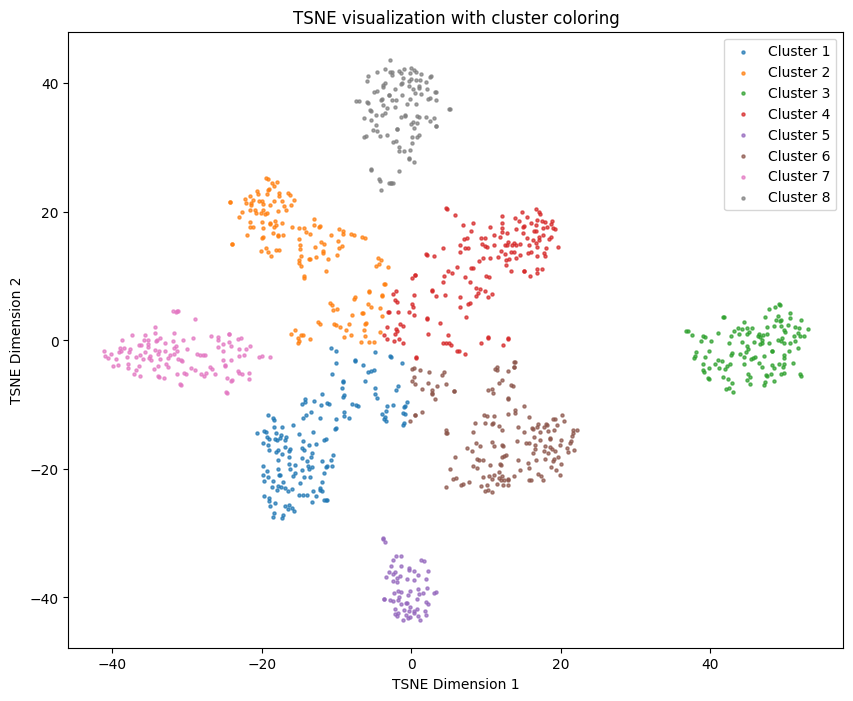

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


# Khởi tạo một tensor ngẫu nhiên với kích thước torch.Size([1094, 768])
# data_tensor = torch.randn(1094, 768)

# Chuyển đổi tensor sang numpy để sử dụng với TSNE của sklearn
data = stacked_tensor.numpy()

# Thực hiện giảm chiều bằng TSNE xuống còn 2 chiều
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Áp dụng KMeans để tìm các cụm, thiết lập số lượng cụm là 5 cho ví dụ
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_tsne)

# Vẽ biểu đồ TSNE với màu sắc khác nhau cho từng cụm
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_points = data_tsne[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=5, label=f'Cluster {cluster + 1}', alpha=0.7)

plt.title("TSNE visualization with cluster coloring")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.legend()
plt.show()

/mnt/disk1/miniconda3/envs/fmfl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


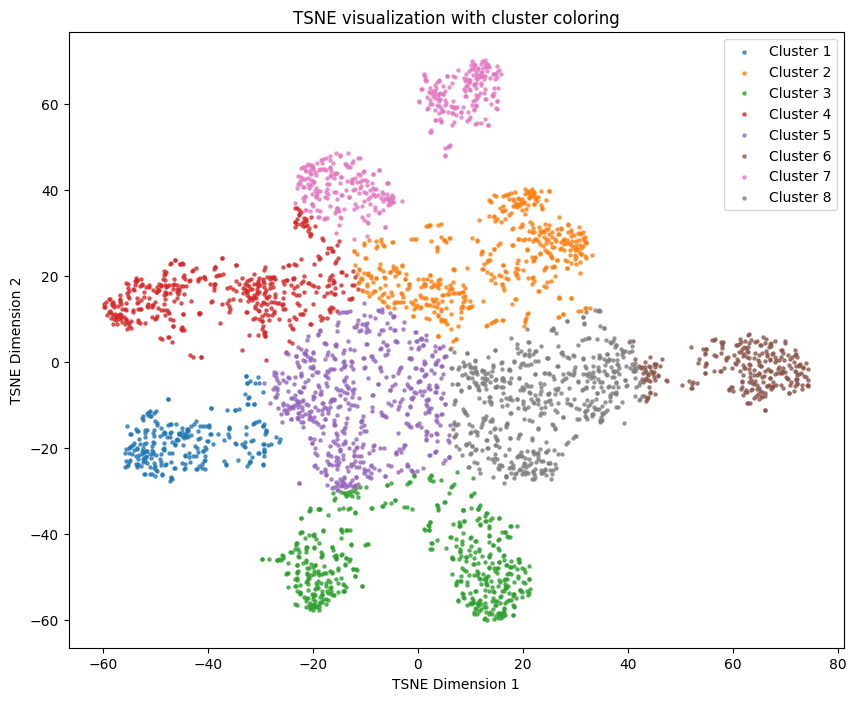

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


# Khởi tạo một tensor ngẫu nhiên với kích thước torch.Size([1094, 768])
data_tensor = torch.load("output/l2p_prob/after_classifier_proposal.pt")

# Chuyển đổi tensor sang numpy để sử dụng với TSNE của sklearn
data = data_tensor.numpy()

# Thực hiện giảm chiều bằng TSNE xuống còn 2 chiều
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Áp dụng KMeans để tìm các cụm, thiết lập số lượng cụm là 5 cho ví dụ
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_tsne)

# Vẽ biểu đồ TSNE với màu sắc khác nhau cho từng cụm
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_points = data_tsne[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=5, label=f'Cluster {cluster + 1}', alpha=0.7)

plt.title("TSNE visualization with cluster coloring")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.legend()
plt.show()

/mnt/disk1/miniconda3/envs/fmfl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


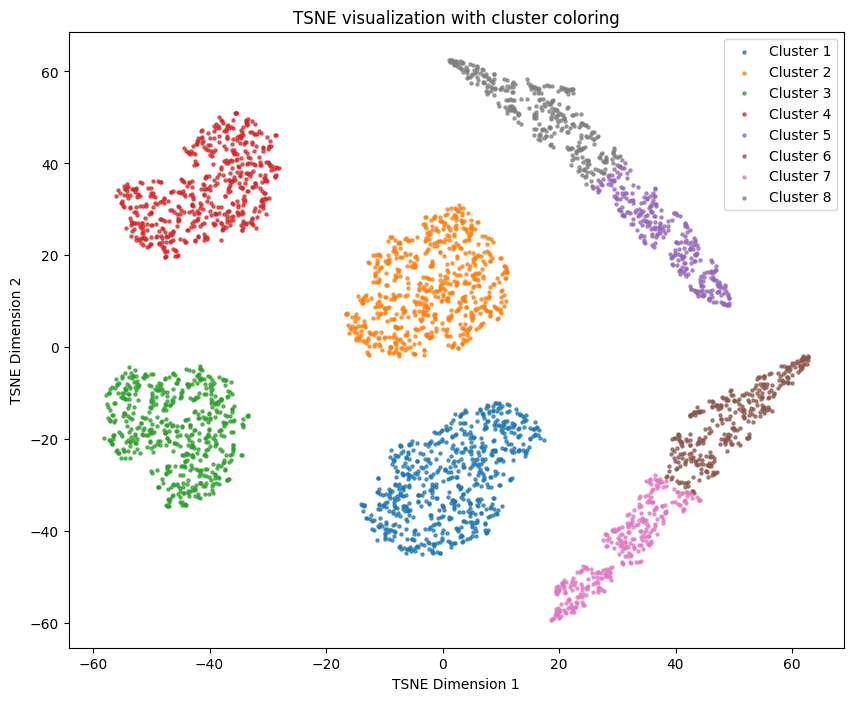

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


# Khởi tạo một tensor ngẫu nhiên với kích thước torch.Size([1094, 768])
data_tensor = torch.load("output/missing_aware/after_classifier_baseline.pt")

# Chuyển đổi tensor sang numpy để sử dụng với TSNE của sklearn
data = data_tensor.numpy()

# Thực hiện giảm chiều bằng TSNE xuống còn 2 chiều
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Áp dụng KMeans để tìm các cụm, thiết lập số lượng cụm là 5 cho ví dụ
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_tsne)

# Vẽ biểu đồ TSNE với màu sắc khác nhau cho từng cụm
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_points = data_tsne[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=5, label=f'Cluster {cluster + 1}', alpha=0.7)

plt.title("TSNE visualization with cluster coloring")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.legend()
plt.show()